In [1]:
http://localhost:8888/notebooks/galvanize/case-study/automotive-eda/stat-analysis.ipynb## IPython Imports
# Used to make notebook wider, comment out for normal notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import clear_output

In [34]:
%matplotlib inline
# Import Libraries
import boto3
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplcyberpunk
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

plt.style.use("cyberpunk")
plt.style.use('dark_background')
# plt.style.use('ggplot')


In [3]:
# GLOBAL VARS
BKT_NAME = 'ds-data-2020'
# DATASET NAMES
the_cc = "auto_data_clean.csv" # Main CLEANED Dataset
# SET DATA PATH/KEYS
KEY = the_cc

In [4]:
# Create boto3 s3 Client Object
s3 = boto3.client('s3')
# Create s3 Bucket Object -> Dict
obj = s3.get_object(Bucket=BKT_NAME, Key=KEY)

In [5]:
# Convert Bucket File to pd.DataFrame
auto_df = pd.read_csv(obj['Body'], low_memory=False)

In [6]:
# PLOTTER FUNCTIONS
def build_scatter(ax_obj:object, x_series:pd.Series, y_series:pd.Series, x_range:tuple, ax_pos=None, fig_obj:object=None, colors:list=None, alpha_col:float=0.7, col_div:bool=False, col_bar:bool=False) -> None:
    """Create scatter plot with color divides by bounds"""
    # Set Default Colors
    colors = colors if colors is not None else ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]
    # Create Bounds From x_series
    bounds = np.arange(*x_range)
    # Create Color Divides by Bound Range
    cmap = matplotlib.colors.ListedColormap(colors) if col_div else None
    norm = matplotlib.colors.BoundaryNorm(bounds, len(colors)) if col_div else None

    # Assign Scatter to ax_obj
    ax_obj.scatter(x_series, y_series, c=x_series, cmap=cmap, norm=norm, alpha=alpha_col)

    # Decoration
    ax_obj.set_title(f'\n{y_series.name} by {x_series.name}\n', fontsize=22)
    ax_obj.set_xlabel(f"{x_series.name}\n", fontsize=18)
    ax_obj.set_ylabel(f"{y_series.name}\n", fontsize=18)
    
    # Add Color Bar
#     if col_bar and (fig_obj is not None and ax_pos is not None):
#         fig_obj.colorbar(bounds, ax=ax_pos, cax=ax_obj, pad=0.2)
    
    # Set Lims
    ax_obj.set_xlim(x_series.min(), x_series.max())

# Cylinder to MPG Density Plot

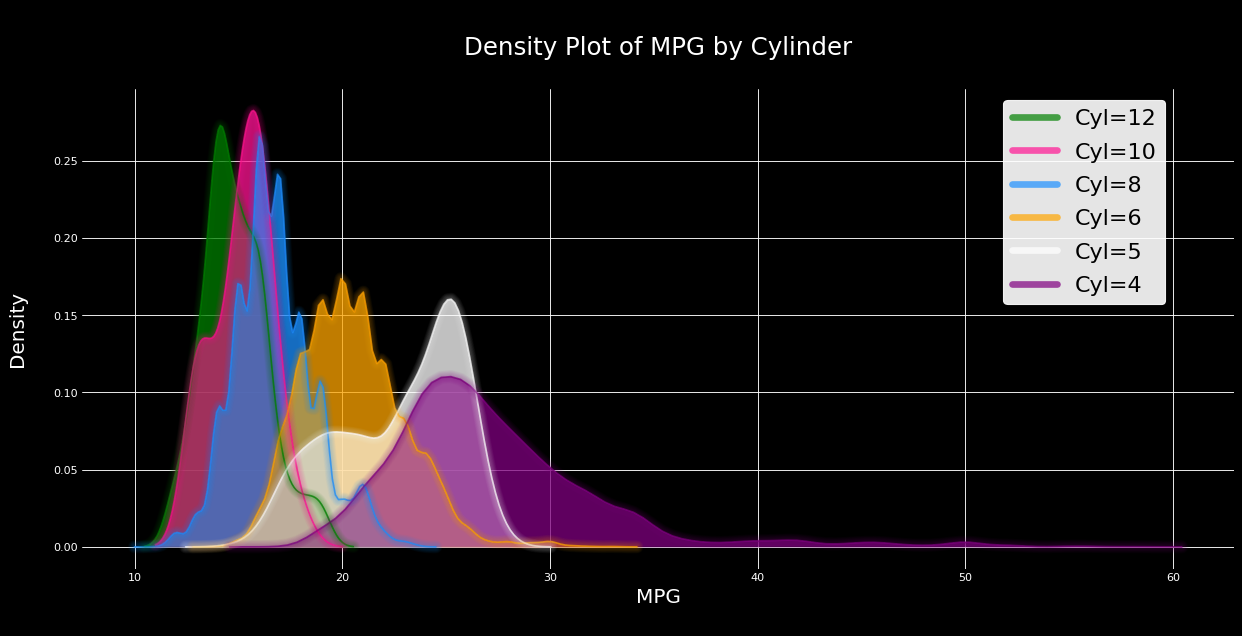

In [129]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
cyls = (sorted(auto_df["Cylinders"].unique())[1:-1][::-1])

# Plot Points
for col, cyl in zip(colors, cyls):
    cyl = int(cyl)
    sns.kdeplot(auto_df.loc[auto_df['Cylinders'] == cyl, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Cyl={cyl}", alpha=.7)
#     sns.set_style("whitegrid")

# Decoration
plt.title('\nDensity Plot of MPG by Cylinder\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(0.45, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show Plot
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

In [8]:
# Create Dataframe Consisting of only 5 Cylinder Vehicles
five_cyl_df = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5]

In [87]:
# Create Groupby Object by 'Brand'
group_5_cyl = auto_df[auto_df["Cylinders"] == 5].groupby("Brand")

# 5-Cylinder Engines to MPG

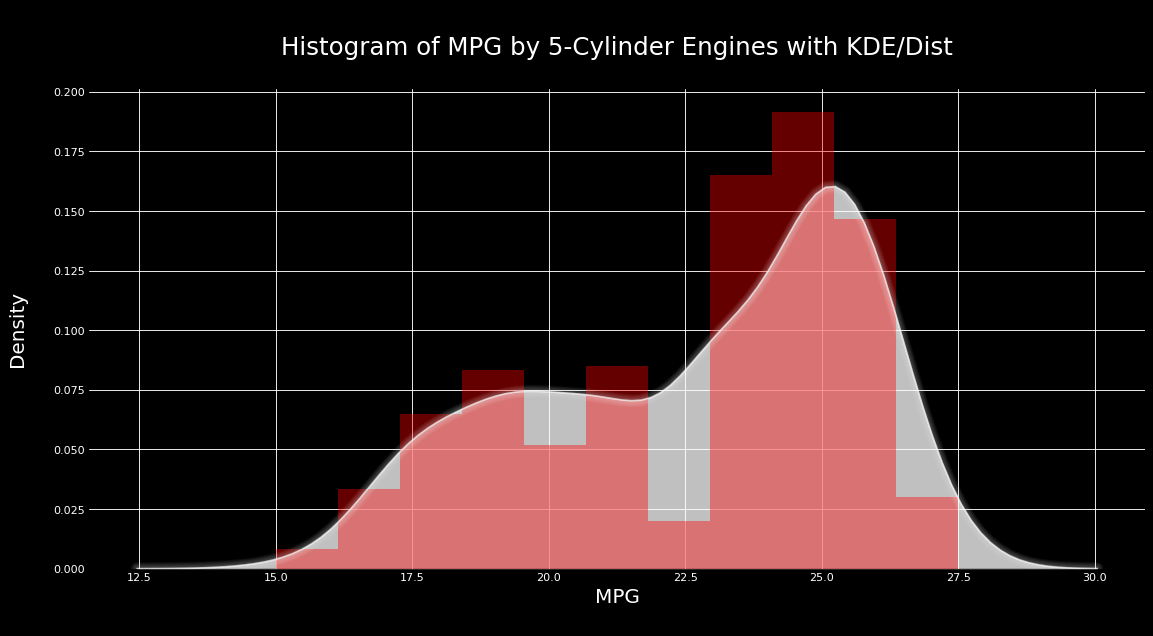

In [51]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

# Plot Points
mpg_kde_plot = sns.distplot(auto_df.loc[auto_df['Cylinders'] == 5, "Gas Mileage (Combined)"],
             color="red",
             kde_kws={
                 "color":'white',
                 "shade":True,
                 "alpha":0.7,
             }
            )

# Decoration
plt.title('\nHistogram of MPG by 5-Cylinder Engines with KDE/Dist\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
mplcyberpunk.add_underglow()
mplcyberpunk.add_glow_effects()

# Show Plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=1, hspace=0)
plt.show()

# 5-Cylinder Engines to MPG Distribution by Brand

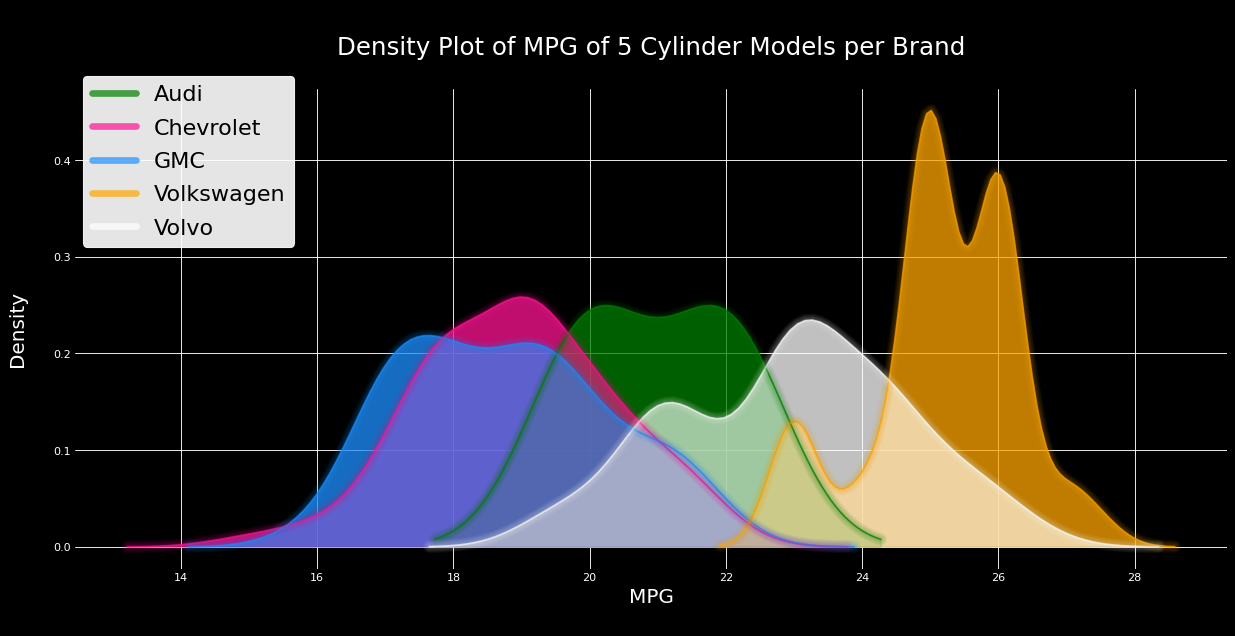

In [127]:
# # plt.style.use('dark_background')
# # plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]

# Plot Points
for col, bdf in zip(colors, group_5_cyl):
    brand = bdf[0]
    sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], shade=True, color=col, label=f"{brand}", alpha=.7)
#     sns.set_style("whitegrid")

# Decoration
plt.title('\nDensity Plot of MPG of 5 Cylinder Models per Brand\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(-0.30, 0.55, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show Plot
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()